In [1]:
import semiolog as slg

import random
import numpy as np
from scipy.signal import argrelextrema
import ipywidgets as widgets
from tqdm.notebook import tqdm

semiotic = slg.load("en_bnc_test")
test_sents = semiotic.test_sents()

In [2]:
test_sent = random.choice(test_sents)

test_sent = "even as the question formed in his mind he knew it was useless"

test = semiotic(test_sent)

score = np.array([p.func_score_s*100000 for p in test.paradigm])

score_maxs = list(argrelextrema(score, np.greater)[0])

score_maxs_pair = slg.util_g.subsequences([0]+score_maxs+[len(score)],2)

phrases = [{k:type for k,type in zip(test.chain.split[l:r],["A" if s==min(score[l:r]) else "F" for s in score[l:r]])} for l,r in score_maxs_pair]

phrases_span = [{k[0]:k[1] for k,type in zip(test.chain.nodes_list[l:r],["A" if s==min(score[l:r]) else "F" for s in score[l:r]])} for l,r in score_maxs_pair]

phrases_df = [slg.util_g.df(
    [p.keys_t_soft for p in test.paradigm[l:r]]
    # ,index=[s 
    # # f"A {l}" if s==min(score[l:r]) else f"F {l}"
    # for s in score[l:r]])
    ) for l,r in score_maxs_pair]
phrases_nodes = [("".join(phr.keys()),(list((phr.values()))[0][0],list((phr.values()))[-1][-1])) for phr in phrases_span]
phrases_cp = set(phrases_nodes).intersection(test.chain.segment("cp").nodes)
# collect_phrase_cp.append(len(phrases_cp)/len(phrases_nodes))

/usr/local/lib/python3.9/site-packages/torch/distributions/distribution.py:44: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +


In [3]:
# test_sent = random.choice(test_sents)

# collect_phrase_cp = []

# for test_sent in tqdm(random.sample(test_sents,1000)):

#     test = semiotic(test_sent)


#     score = np.array([p.func_score_s*100000 for p in test.paradigm])

#     score_maxs = list(argrelextrema(score, np.greater)[0])

#     score_maxs_pair = slg.util_g.subsequences([0]+score_maxs+[len(score)],2)

#     phrases = [{k:type for k,type in zip(test.chain.split[l:r],["A" if s==min(score[l:r]) else "F" for s in score[l:r]])} for l,r in score_maxs_pair]

#     phrases_span = [{k[0]:k[1] for k,type in zip(test.chain.nodes_list[l:r],["A" if s==min(score[l:r]) else "F" for s in score[l:r]])} for l,r in score_maxs_pair]

#     phrases_df = [slg.util_g.df(
#         [p.keys_t_soft for p in test.paradigm[l:r]]
#         # ,index=[s 
#         # # f"A {l}" if s==min(score[l:r]) else f"F {l}"
#         # for s in score[l:r]])
#         ) for l,r in score_maxs_pair]
#     phrases_nodes = {("".join(phr.keys()),(list((phr.values()))[0][0],list((phr.values()))[-1][-1])) for phr in phrases_span}
#     phrases_cp = phrases_nodes.intersection(test.chain.segment("cp").nodes)
#     collect_phrase_cp.append(len(phrases_cp)/len(phrases_nodes))


{('thequestionformedin', (6, 25)), ('itwasuseless', (38, 50)), ('evenas', (0, 6)), ('hismind', (25, 32)), ('heknew', (32, 38))}


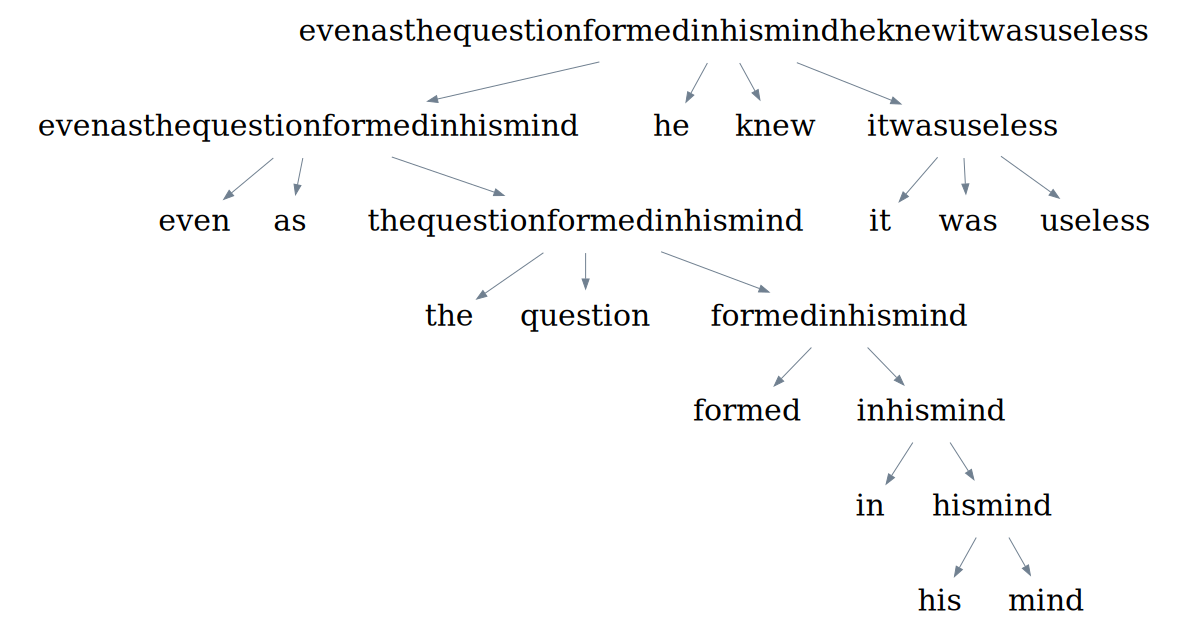

In [5]:
print(phrases_nodes)
test.chain.segment("ud").plot()

In [6]:
test.chain.segment("ud").edges

[(('evenasthequestionformedinhismind', (0, 32)), ('even', (0, 4))),
 (('evenasthequestionformedinhismindheknewitwasuseless', (0, 50)),
  ('evenasthequestionformedinhismind', (0, 32))),
 (('thequestionformedinhismind', (6, 32)), ('the', (6, 9))),
 (('evenasthequestionformedinhismind', (0, 32)),
  ('thequestionformedinhismind', (6, 32))),
 (('thequestionformedinhismind', (6, 32)), ('formedinhismind', (17, 32))),
 (('formedinhismind', (17, 32)), ('inhismind', (23, 32))),
 (('hismind', (25, 32)), ('his', (25, 28))),
 (('inhismind', (23, 32)), ('hismind', (25, 32))),
 (('evenasthequestionformedinhismindheknewitwasuseless', (0, 50)),
  ('he', (32, 34))),
 (('itwasuseless', (38, 50)), ('it', (38, 40))),
 (('evenasthequestionformedinhismindheknewitwasuseless', (0, 50)),
  ('itwasuseless', (38, 50))),
 (('itwasuseless', (38, 50)), ('useless', (43, 50))),
 (('evenasthequestionformedinhismind', (0, 32)), ('as', (4, 6))),
 (('thequestionformedinhismind', (6, 32)), ('question', (9, 17))),
 (('forme

In [6]:
# Integrate reconstruction of segmentation of tree out of UD
doc = semiotic.ud(test_sent)
ud_segs = []
doc_idx = {token:(token.idx-i,token.idx-i+len(token)) for i,token in enumerate(doc)}

ud_segs = []
ud_segs_dict = []
for token_doc in doc:
    subtrees = []
    subtrees_control = []
    for token in token_doc.subtree:
        subtrees_control.append(doc_idx[token])
        for i in doc_idx[token]:
            subtrees.append(i)
    contuiguous_breaks = [l for l,r in slg.util_g
    .subsequences(subtrees,2) if l==r]
    real_breaks = [b for b in subtrees if b not in contuiguous_breaks]
    real_intervals = sorted([(real_breaks[2*i],real_breaks[2*i+1]) for i in range(int(len(real_breaks)/2))])
    final_subtrees = [(test.chain.norm[l:r],(l,r)) for l,r in real_intervals]
    for subtree_f in final_subtrees:
        ud_segs.append(subtree_f)
        ud_segs.append(subtree_f)
        ud_segs_dict.append((token_doc,subtree_f))
ud_words = [(str(l),i) for l,i in doc_idx.items()]
ud_segs_dict_bla = dict(ud_segs_dict)

ud_tree = [(ud_segs_dict_bla[token.head],ud_segs_dict_bla[token]) for token in doc if ud_segs_dict_bla[token]!= ud_segs_dict_bla[token.head]]
head_edges = [(node,(token.text,doc_idx[token])) for token,node in ud_segs_dict if token.text!=node[0]]
heads = [r for l,r in head_edges]
ud_tree+=head_edges
ud_tree_edges = sorted(ud_tree, key=lambda x: x[0][1][0])
ud_tree_nodes = set(slg.util_g.flatten(ud_tree_edges))

print(phrases_nodes)
phrases_nodes.intersection(ud_tree_nodes)

{('discontinuousemployment', (0, 23)), ('wasanintegralpart', (23, 40)), ('sworkinglives', (52, 65)), ('ofthesewomen', (40, 52))}


{('discontinuousemployment', (0, 23))}

In [43]:
set(range(10))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

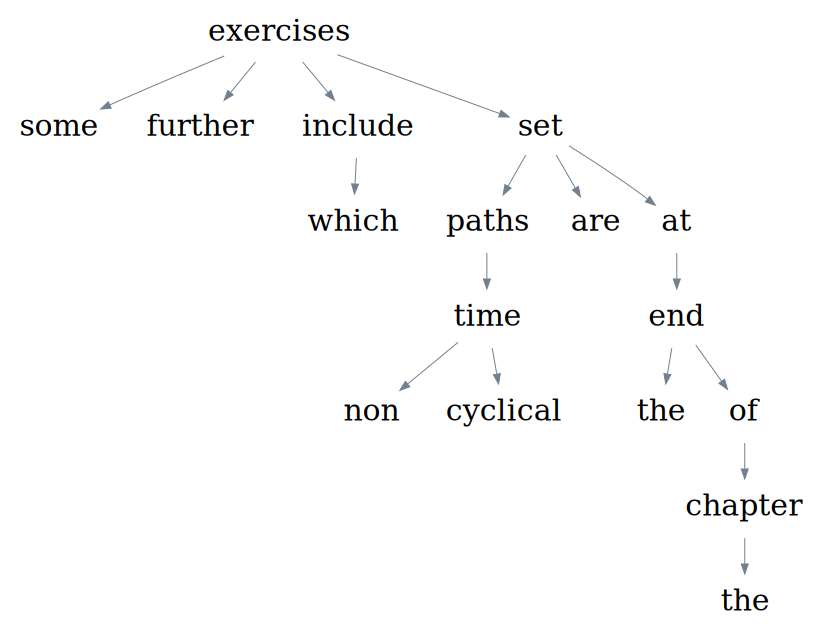

In [54]:
test.chain.segment("ud").plot()

0.5


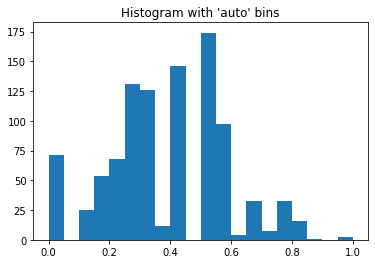

In [51]:
from statistics import mean,median,mode
sum([i for i in collect_phrase_cp if i==1])

import matplotlib.pyplot as plt
# rng = np.random.RandomState(10)  # deterministic random data
# a = np.hstack((rng.normal(size=1000),rng.normal(loc=5, scale=2, size=1000)))

print(mode(collect_phrase_cp))

_ = plt.hist(collect_phrase_cp, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [7]:
HO_types = []
phrases_strings = [" ".join([" ".join(phrases[j].keys()) if j!=i else "[MASK]" for j in range(len(phrases))]) for i in range(len(phrases))]
for sent in phrases_strings:

    HO_types.append([i["token_str"] for i in semiotic.unmasker(sent)])

slg.util_g.df(HO_types)

,0,1,2,3,4
0,casualties,claims,continued,",",.
1,victory,still,",",.,;
2,losses,reportedly,continues,;,:
3,targets,has,remains,yet,—
4,gains,claim,stands,elusive,…
...,...,...,...,...,...
95,execution,charges,raged,except,。
96,pursuit,signals,emerged,fate,hence
97,aim,routes,!,!,preceding
98,goals,there,counts,impossible,given


In [185]:
semiotic.unmasker(sent)[0][]

{'sequence': 'hymns for example were written as a mythological expression of the gospel story',
 'score': 0.14037135243415833,
 'token': 17777,
 'token_str': 'hymns'}

fagin was the only other person in the room and he was boiling coffee in a pan


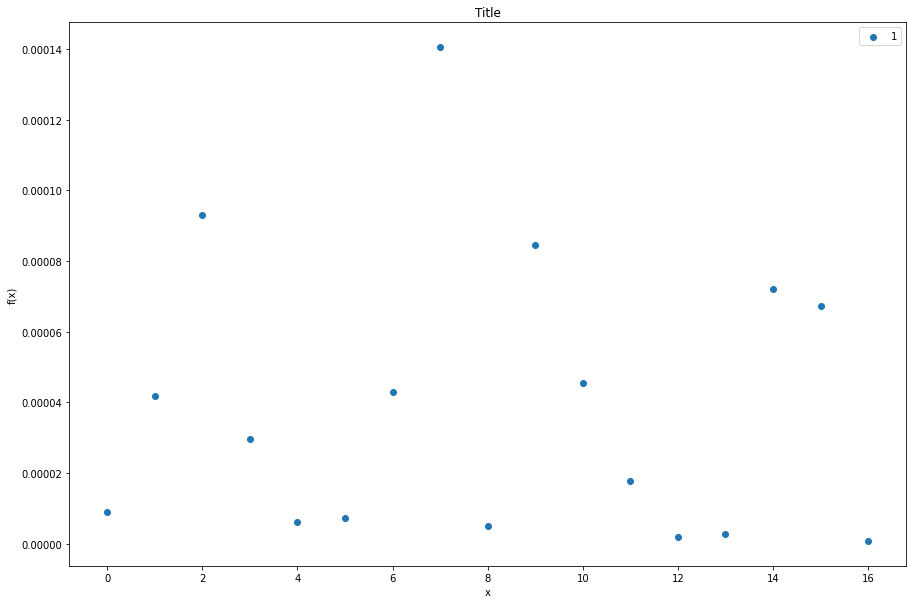

In [163]:
slg.util_g.scatter_plot([
    [p.func_score_s  for p in test.paradigm],
    # [p.mass for p in test.paradigm]
    ]
    ).plot()
print(test.chain.raw)

In [75]:
list(score_maxs[0])

[2, 5, 9, 12, 16]

In [42]:
from pandas import DataFrame as df
print(test.chain.raw)
slg.util_g.clear_df(df([p.keys_t_soft for p in test.paradigm],index=[f"{t} ({round(p.func_score_s*1000,3)})" for t,p in zip(test.chain.split,test.paradigm)]).T)

november 4 the dream turns sour leeds are knocked out of europe by rangers


,november (0.008),4 (0.008),the (0.009),dream (0.003),turns (0.003),sour (0.087),leeds (0.003),are (0.037),knocked (0.001),out (0.016),of (0.078),europe (0.005),by (0.073),rangers (0.001)
0,round,28,—,season,##works,against,angels,were,kicked,out,across,contention,by,leeds
1,may,19,vs,weather,##land,out,##s,are,knocked,off,in,playoffs,via,wolves
2,game,29,@,league,##time,on,reds,united,swept,clear,throughout,promotion,against,phoenix
3,episode,14,celtic,game,##coat,fc,dreams,fc,chased,outside,of,favour,behind,tnt
4,april,26,2018,final,league,away,##dies,bulldogs,driven,ahead,from,competition,with,default
5,day,27,leeds,winner,##card,to,spirits,rangers,taken,champions,to,play,after,liverpool
6,season,22,2009,series,club,down,they,reds,blown,queen,for,playoff,at,|
7,june,4,*,mighty,##world,at,##ers,narrowly,sent,champion,into,action,to,avalanche
8,stage,12,2007,premiership,against,onto,rangers,city,drafted,tour,outside,relegation,as,cinderella
9,october,21,2017,ball,makers,into,hearts,is,forced,north,central,existence,champions,england


In [37]:
slg.util_g.clear_df(df([p.keys_t for p in test.paradigm],index=[f"{t} ({round(p.func_score*1000,3)} {i})" for t,p,i in zip(test.chain.split,test.paradigm,range(len(test.chain.split)))]).T)

,she (0.001 0),longed (0.005 1),at (1000 2),that (0.9 3),moment (1000 4),to (1000 5),feel (1000 6),his (1000 7),strong (0.094 8),arms (1000 9),around (0.018 10),her (0.376 11),his (0.008 12),firm (0.017 13),lips (1000 14),on (1000 15),hers (1000 16)
0,she,awoke,,any,,,,,warm,,around,and,very,warm,,,
1,abby,turned,,,,,,,,,surround,with,fiercely,soft,,,
2,darcy,woke,,,,,,,,,grasp,beneath,own,firm,,,
3,he,wanted,,,,,,,,,beneath,by,soft,tender,,,
4,cassie,,,,,,,,,,guiding,against,perfectly,,,,
5,niall,,,,,,,,,,against,holding,softly,,,,
6,julia,,,,,,,,,,behind,,warm,,,,
7,liz,,,,,,,,,,crushing,,surprisingly,,,,
8,ari,,,,,,,,,,surrounding,,incredibly,,,,
9,allison,,,,,,,,,,over,,gently,,,,


In [22]:
semiotic.voc.prob["and"]

0.007703130631002905

In [ ]:
import spacy
import benepar

nlp_ud = spacy.load("en_core_web_sm")

nlp_cp = spacy.load("en_core_web_sm")
nlp_cp.add_pipe("benepar", config={"model": "benepar_en3"})

In [ ]:

bla = list(nlp_cp(test.chain.raw).sents)[0]
terminal_bigrams = [c for c in list(bla._.constituents) if str(c).count(" ") == 1]
print(terminal_bigrams)
parad_analysis = [(p.entropy,p.mass,l) for l,p in zip(test.chain.split,test.paradigm)]
print(sorted(parad_analysis)[-len(terminal_bigrams):])
df(parad_analysis).T

In [6]:
print(test.chain.raw)
slg.util_g.clear_df(df([list(p.keys_t) for p in test.paradigm]).T)

she did nt go straight from the house to the station hotel


,0,1,2,3,4,5,6,7,8,9,10,11
0,neither,lets,,drive,straight,,custom,station,of,the,savoy,house
1,nor,can,,##t,directly,,customs,hotel,at,victoria,dorchester,##house
2,nobody,let,,##h,away,,somerset,subway,outside,paddington,hilton,##room
3,never,will,,walk,down,,burlington,airport,behind,waterloo,grand,office
4,so,wants,,runs,back,,parliament,train,to,railway,mayfair,building
...,...,...,...,...,...,...,...,...,...,...,...,...
95,,##ehan,,miles,daily,,coffee,jail,,harbour,kings,
96,,,,travelling,tram,,norfolk,street,,hamilton,greenwich,
97,,,,shopping,,,wesley,gates,,railroad,courtyard,
98,,,,##se,,,ferry,village,,dorchester,paris,


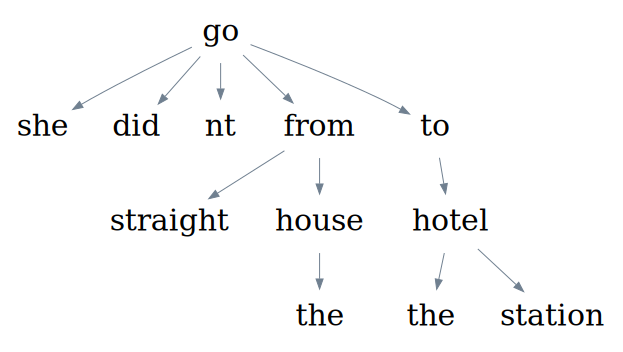

In [7]:
test.chain.segment("ud").plot()

In [34]:
for p in range(len(test.chain.split)):
    parad_k = test.paradigm[p].keys_t

    len_parad = len(parad_k)

    for n in range(1,5):
        counter = Counter([k[-n:] for k in parad_k]).most_common(5)
        print([(k,v/len_parad) for k,v in counter if v/len_parad>.1])
    print("*************")

[('s', 0.22340425531914893), ('e', 0.2127659574468085), ('y', 0.11702127659574468), ('r', 0.10638297872340426)]
[]
[]
[]
*************
[('s', 0.4375), ('d', 0.2708333333333333)]
[('es', 0.15625), ('ed', 0.15625)]
[]
[]
*************
[]
[]
[]
[]
*************
[('s', 0.26262626262626265), ('g', 0.1414141414141414)]
[('ng', 0.13131313131313133)]
[('ing', 0.13131313131313133)]
[]
*************
[('g', 0.18556701030927836), ('e', 0.12371134020618557), ('t', 0.1134020618556701), ('y', 0.1134020618556701), ('d', 0.10309278350515463)]
[('ng', 0.18556701030927836)]
[('ing', 0.17525773195876287)]
[]
*************
[]
[]
[]
[]
*************
[('e', 0.18), ('n', 0.15), ('r', 0.11)]
[('on', 0.12)]
[]
[]
*************
[('e', 0.18), ('n', 0.11), ('l', 0.11), ('y', 0.11), ('t', 0.11)]
[]
[]
[]
*************
[('f', 0.16666666666666666), ('t', 0.16666666666666666), ('e', 0.16666666666666666), ('d', 0.16666666666666666), ('o', 0.16666666666666666)]
[('of', 0.16666666666666666), ('at', 0.16666666666666666), 

In [25]:
test_sent = random.sample(test_sents,50)

collect = slg.util_g.multiprocessing(semiotic,test_sent)

In [27]:
from tqdm.notebook import tqdm

collect2 = []
for sent in tqdm(test_sent):
    collect2.append(semiotic(sent))

In [1]:
from collections import Counter
bla = Counter()
for s in collect2:
    for p in s.paradigm:
        bla[p.keys]+=1

# bla.most_common(20)


NameError: name 'collect2' is not defined